# Init

In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['patch.linewidth'] = 1.5

Welcome to JupyROOT 6.10/09


/cvmfs/cms.cern.ch/slc6_amd64_gcc630/lcg/root/6.10.08-elfike2/lib/ROOT.py:318: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return _orig_ihook( name, *args, **kwds )


In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.__file__)
print(pd.__version__)
print(pd.__file__)

2.2.3
/uscms/home/as2872/.local/lib/python2.7/site-packages/matplotlib/__init__.pyc
0.23.4
/uscms/home/as2872/.local/lib/python2.7/site-packages/pandas/__init__.pyc


In [3]:
def extract_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    ROOT.gPad.Update()
    
    tot = eff.GetTotalHistogram()
    nBins = tot.GetNbinsX()
    xx = []
    yy = []
    yl = []
    yu = []
    for i in range(1, nBins+1):
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 0 and eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)) == 1.: continue
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 1. and eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)) == 1.: continue
        
        xx.append(tot.GetXaxis().GetBinCenter(i))
        yy.append(eff.GetEfficiency(eff.GetGlobalBin(i)))
        yl.append(eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)))
        yu.append(eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)))
                  
    
    return {'x': np.array(xx),
            'y': np.array(yy),
            'yerr': np.array([yl, yu])}

# Data input

In [4]:
# tree = uproot.open('../Firefighter/washAOD/test/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2_100k.root')['RECO_muTrackEffi/recoEffiForMuTrack']
# df = tree.pandas.df()

ctau = '1000'

dfs_dsa = OrderedDict()
dfs_dsa[5.25] = uproot.open('../Firefighter/washAOD/Mchi-5p25_dMchi-0p5_ctau-%s.root' % ctau)['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[6.0] = uproot.open('../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-%s.root' % ctau)['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[52.5] = uproot.open('../Firefighter/washAOD/Mchi-52p5_dMchi-5_ctau-%s.root' % ctau)['RECO_dsa/recoEffiForMuTrack'].pandas.df()
dfs_dsa[60.0] = uproot.open('../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-%s.root' % ctau)['RECO_dsa/recoEffiForMuTrack'].pandas.df()

In [5]:
for k, df in dfs_dsa.items():
    df.columns = [x.decode() for x in df.columns]

In [6]:
dfs_dsa[5.25]

nMatched     genPt    genEta    genPhi      genVxy  \
entry subentry                                                       
0     0              0.0  1.180708 -1.542569 -1.127671  114.187248   
      1              NaN  1.004341 -1.351402 -0.870878  114.187248   
1     0              0.0  0.517491  1.248288 -1.151799  152.634384   
      1              NaN  0.648859  1.285832 -0.716943  152.634384   
2     0              0.0  0.292531  0.032327  0.504354  166.507980   
      1              NaN  0.113624 -0.157416  0.199936  166.507980   
3     0              0.0  0.333683  0.214421  2.831837  275.537445   
      1              NaN  0.297461  0.214822  2.387512  275.537445   
4     0              0.0  1.285656 -0.334670  1.152850  220.271301   
      1              NaN  1.999658 -0.357457  1.225759  220.271301   
5     0              0.0  0.648909 -1.848117 -1.337892  251.188690   
      1              NaN  0.405949 -1.231171 -1.693266  251.188690   
6     0              0.0  0.627469  0.817200  0.340245   64.862022   
      1              NaN  0.521782  0.370368  0.135785   64.862022   
7     0              0.0  1.021555  0.294806 -1.160993  533.579407   
      1              NaN  0.931040  0.675525 -1.142617  533.579407   
8     0              0.0  1.144390 -1.702300  0.937794  242.894897   
      1              NaN  2.657400 -1.646701  0.762105  242.894897   
9     0              0.0  1.996174 -0.563111  1.859208  727.063477   
      1              NaN  1.519397 -0.645145  1.848346  727.063477   
10    0              0.0  0.834303  1.331357 -1.224312  126.053268   
      1              NaN  0.851977  1.446860 -1.462922  126.053268   
11    0              0.0  0.428515  1.860974  1.138958   39.370876   
      1              NaN  0.529389  1.971831  0.419051   39.370876   
12    0              0.0  3.334347  0.928268  1.160967  513.699524   
      1              NaN  1.456585  0.843735  1.198461  513.699524   
13    0              0.0  1.168448  1.321608 -1.841665   12.266994   
      1              NaN  0.786113  1.138721 -1.576655   12.266994   
14    0              0.0  0.192983  1.693884  2.355736  471.622528   
      1              NaN  1.699801  1.228654  2.502866  471.622528   
...                  ...       ...       ...       ...         ...   
21807 0              0.0  2.262043 -0.658125  2.399194  560.362915   
      1              NaN  2.332350 -0.657377  2.283640  560.362915   
21808 0              1.0  0.660638 -1.584729 -0.977295  375.819916   
      1              NaN  1.083572 -1.442521 -0.774576  375.819916   
21809 0              0.0  1.907488  1.642617  2.211206  243.173325   
      1              NaN  1.112892  1.449481  2.105952  243.173325   
21810 0              0.0  0.404042  0.246628  0.644746   77.489830   
      1              NaN  0.957303 -0.009404  0.291253   77.489830   
21811 0              0.0  2.829072 -0.813398  0.111602  275.193146   
      1              NaN  1.624824 -0.865458  0.127109  275.193146   
21812 0              0.0  0.631353  1.104282 -1.518959  164.299301   
      1              NaN  4.452775  0.971530 -1.474171  164.299301   
21813 0              0.0  0.392102  2.093753  1.760105    5.304719   
      1              NaN  0.690433  1.547786  1.979646    5.304719   
21814 0              0.0  0.277464 -0.951400  0.251107    6.557730   
      1              NaN  0.776535 -0.276294  0.155402    6.557730   
21815 0              0.0  0.103451  0.194042  2.139998  151.353485   
      1              NaN  0.415004  1.153995  2.110771  151.353485   
21816 0              0.0  2.520211  0.033528 -2.773572   14.677981   
      1              NaN  0.422068 -0.162605 -2.962043   14.677981   
21817 0              0.0  1.647177 -1.805188 -1.093202  143.889435   
      1              NaN  1.345365 -1.860093 -0.950385  143.889435   
21818 0              0.0  0.091017 -0.182343  0.302274  177.661728   
      1              NaN  0.264904  0.297127  0.455786  177.661728   
21819 0              0.0  

# Number of muons

Algorithm: dSA, lifetime 5: 0.002612 counts
Algorithm: dSA, lifetime 6: 0.049084 counts
Algorithm: dSA, lifetime 52: 0.109081 counts
Algorithm: dSA, lifetime 60: 0.601934 counts


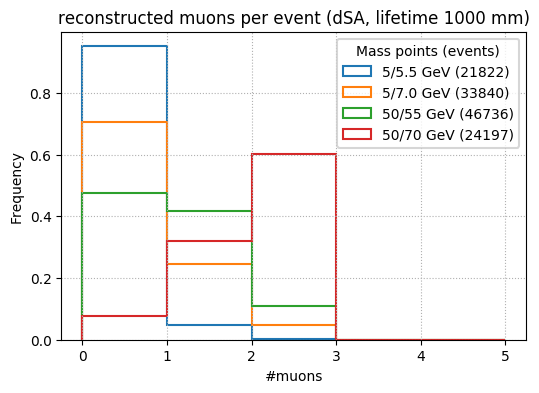

In [8]:
labels = OrderedDict()
labels[5.25] = '5/5.5 GeV'
labels[6] = '5/7.0 GeV'
labels[52.5] = '50/55 GeV'
labels[60] = '50/70 GeV'

def make_num_muon_plot(collection, name):

    fig, ax = plt.subplots(figsize=(6,4))

    nevents = {}
    for k, df in collection.items():
        nevents[k] = len(df['nMatched'].dropna())
        df['nMatched'].plot.hist(bins=5, range=(0,5), ax=ax, label='%s (%d)' % (labels[k], nevents[k]), histtype='step', density=True)
        counts, binedges = np.histogram(df['nMatched'].dropna(), bins=5, range=(0,5), density=True)
        print("Algorithm: %s, lifetime %d: %f counts" % (name, k, counts[2]))

    ax.set_xlabel('#muons')
    ax.grid()
    plt.title('reconstructed muons per event (%s, lifetime %s mm)' % (name, ctau))
    plt.legend(loc='upper right', title='Mass points (events)')
    pd.Series(nevents)
    plt.savefig("ctau-%smm_%s/num_muons.pdf" % (ctau, name.lower()))

make_num_muon_plot(dfs_dsa, "dSA")

# Comparison, reconstructed vs gen-level

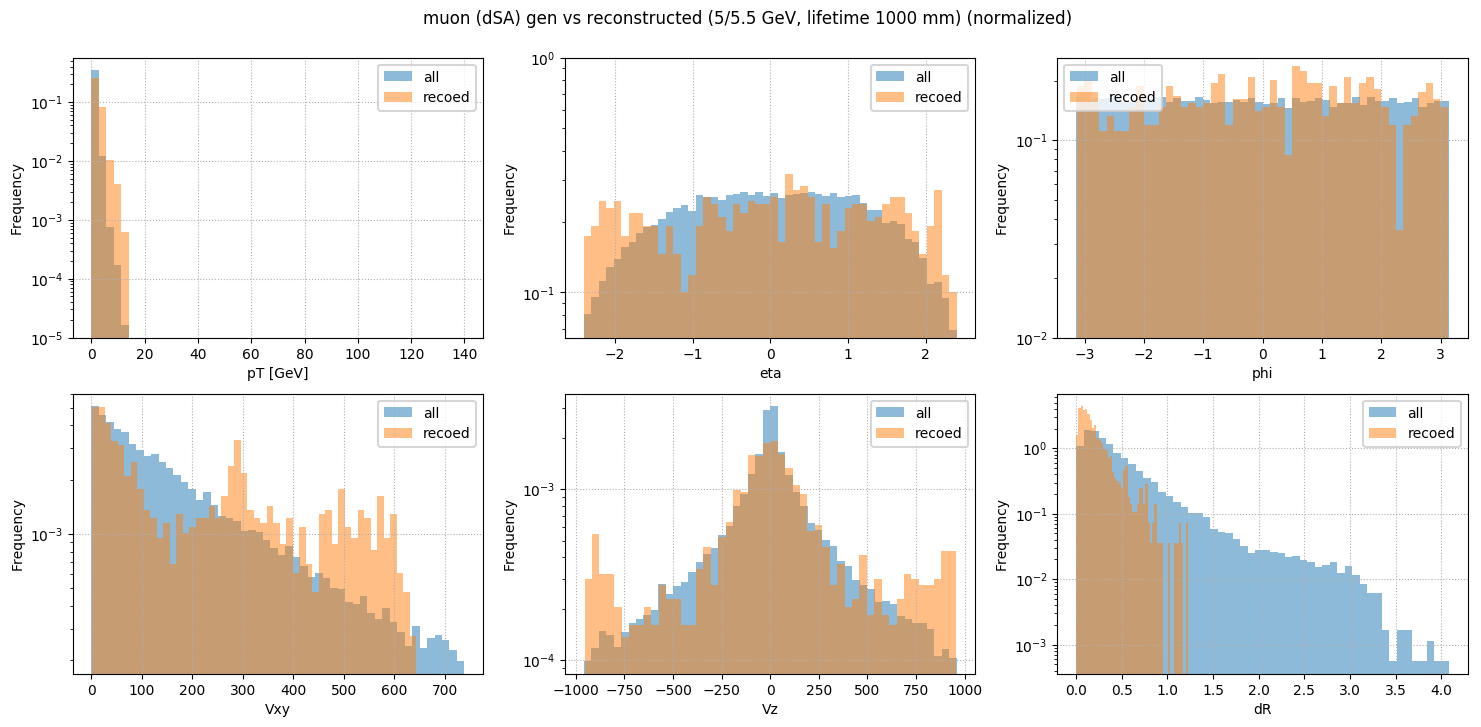

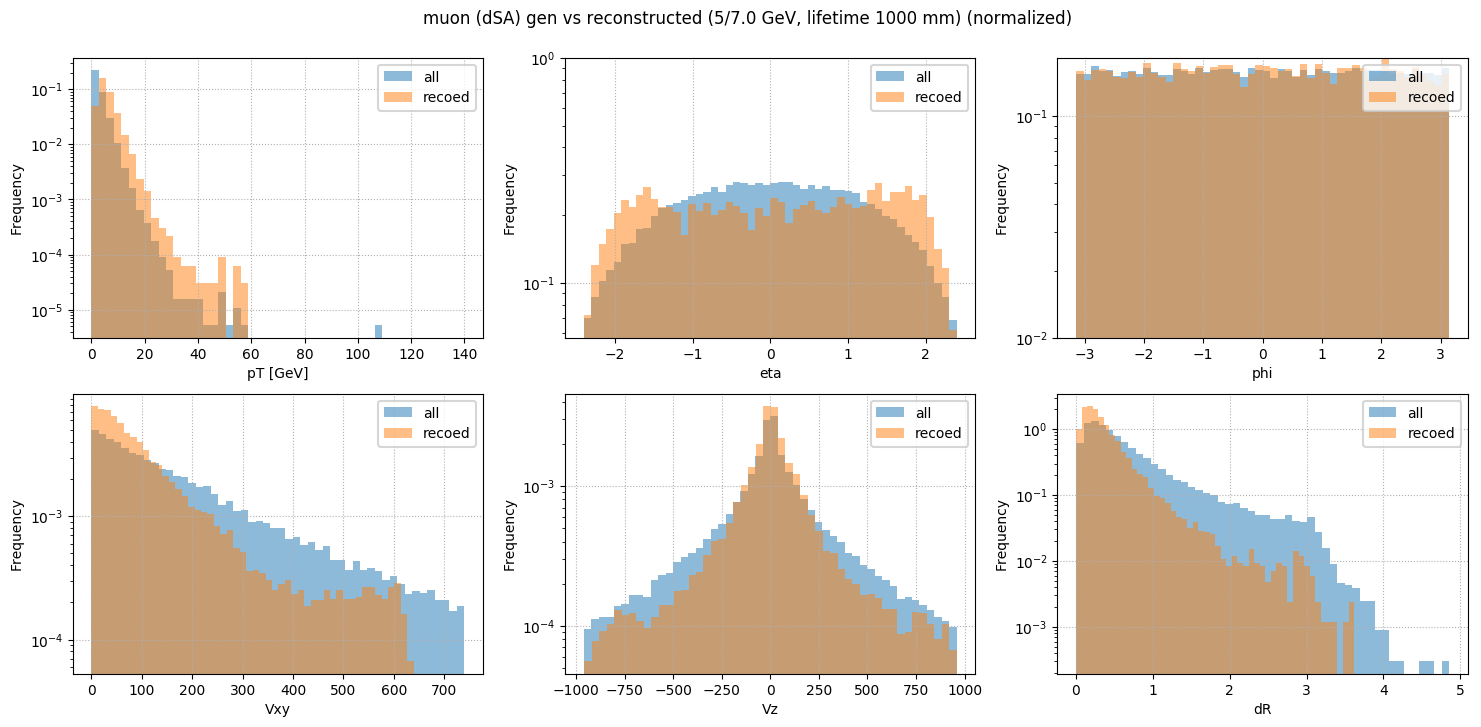

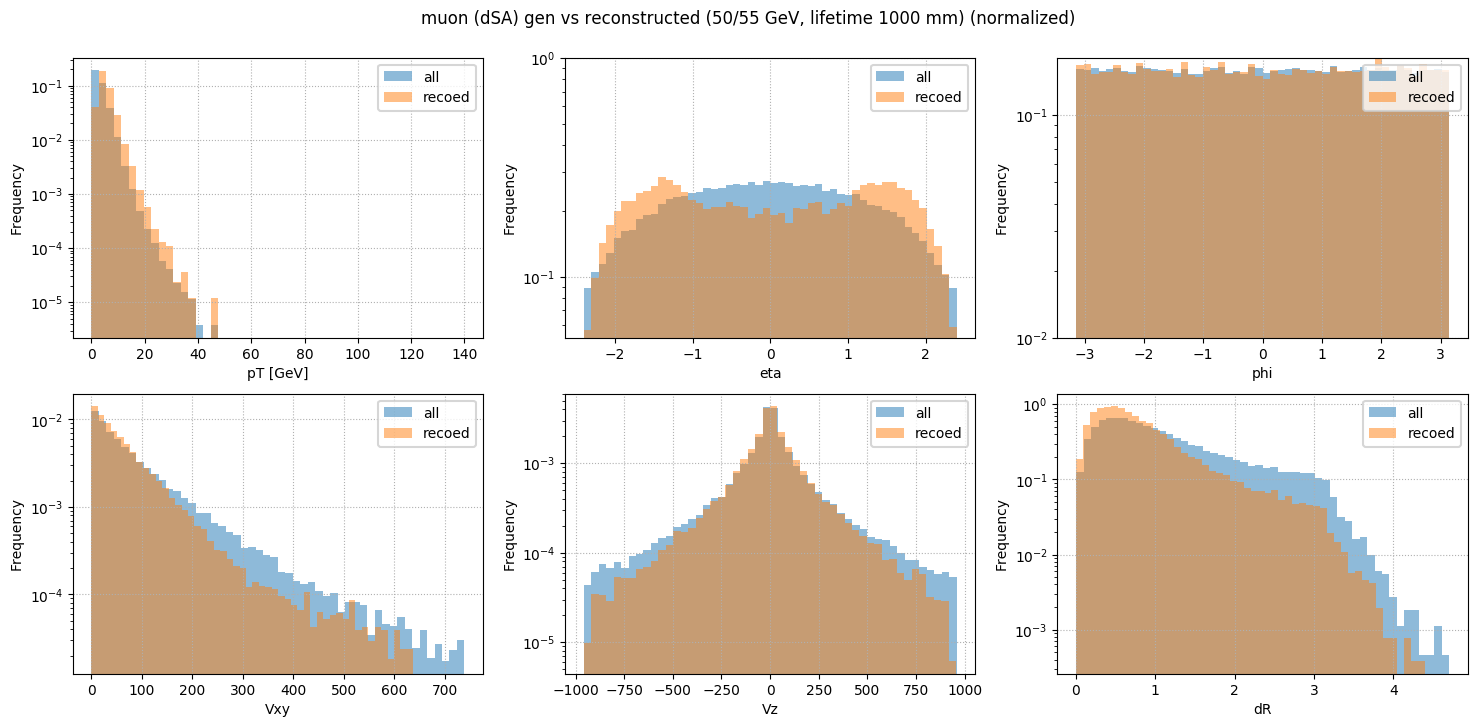

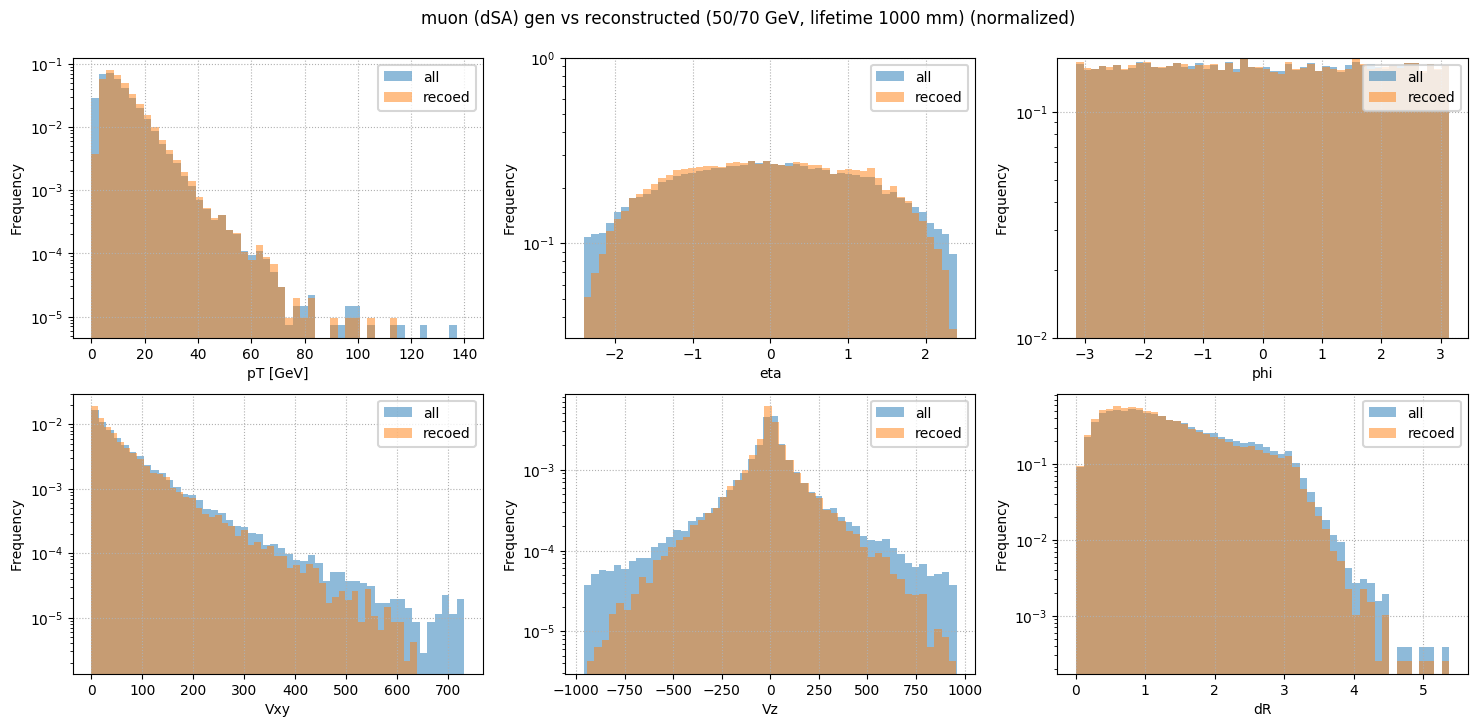

In [9]:
def make_all_comp_plots(collection, name, masspoint):

    fig, ax = plt.subplots(2,3, figsize=(18,8))
    fig.suptitle('muon (%s) gen vs reconstructed (%s, lifetime %s mm) (normalized)' % (name, labels[masspoint],ctau), y=0.94)

    df = collection[masspoint]

    recoDf = df[['genPt','genEta','genPhi', 'genVxy', 'genVz', 'genDr', 'recoPt']].dropna()

    df['genPt']    .plot.hist(bins=50, range=(0,140), ax=ax[0,0], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genPt'].plot.hist(bins=50, range=(0,140), ax=ax[0,0], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 0].set_xlabel('pT [GeV]')

    df['genEta']    .plot.hist(bins=50, range=(-2.4,2.4), ax=ax[0,1], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genEta'].plot.hist(bins=50, range=(-2.4,2.4), ax=ax[0,1], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 1].set_xlabel('eta')
    ax[0, 1].set_yticks([0.1,1])

    df['genPhi']    .plot.hist(bins=50, ax=ax[0,2], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genPhi'].plot.hist(bins=50, ax=ax[0,2], label='recoed', logy=True, density=True, alpha=0.5)
    ax[0, 2].set_xlabel('phi')
    ax[0, 2].set_yticks([0.01,0.1])

    df['genVxy']    .plot.hist(bins=50, ax=ax[1,0], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genVxy'].plot.hist(bins=50, ax=ax[1,0], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 0].set_xlabel('Vxy')

    df['genVz']    .plot.hist(bins=50, ax=ax[1,1], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genVz'].plot.hist(bins=50, ax=ax[1,1], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 1].set_xlabel('Vz')

    df['genDr']    .plot.hist(bins=50, ax=ax[1,2], label='all', logy=True, density=True, alpha=0.5)
    recoDf['genDr'].plot.hist(bins=50, ax=ax[1,2], label='recoed', logy=True, density=True, alpha=0.5)
    ax[1, 2].set_xlabel('dR')

    for a in ax:
        for b in a:
            b.legend(loc='best')
            b.grid()

    plt.savefig("ctau-%smm_%s/all_comp_%s.pdf" % (ctau, name.lower(), \
                                                  labels[masspoint].replace('/','-').replace(' ','').replace('.','p')))
    
make_all_comp_plots(dfs_dsa, "dSA", 5.25)
make_all_comp_plots(dfs_dsa, "dSA", 6.0)
make_all_comp_plots(dfs_dsa, "dSA", 52.5)
make_all_comp_plots(dfs_dsa, "dSA", 60)



# Efficiency plots

In [10]:
import scipy.special
from scipy.optimize import curve_fit, fsolve
def func(z,p0,p1,p2,p3):
    return p2 + p3*scipy.special.erf((z-p0)/p1)
def func2(z, p0, p1, p2, p3, p4):
    return func(z, p0, p1, p2, p3) - p4*0.98

In [27]:
def make_plot(ax, k, df, recodf, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F('h0_%d' % k, '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F('h1_%d' % k, '', nbins, binIni, binEnd)
    for x in df[variable]: h0.Fill(x)
    for x in recodf[variable]: h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label='%s' % labels[k], markersize=3)
        
def make_plot_fit(ax, k, df, recodf, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F('h0_%d' % k, '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F('h1_%d' % k, '', nbins, binIni, binEnd)
    for x in df[variable]: h0.Fill(x)
    for x in recodf[variable]: h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt=all_colors[k]+'o', label='%s' % labels[k], markersize=3, alpha=0.3)
    if variable == 'genPt':
        maxbin = 60 if k == 5.25 else 90
        popt, pcov = curve_fit(func, data['x'][0:maxbin], data['y'][0:maxbin])
        percentile98 = fsolve(func2, 3, (popt[0], popt[1], popt[2], popt[3], popt[2]+popt[3]))
        ax.plot(data['x'][0:maxbin], func(data['x'][0:maxbin], *popt),  \
                label='max. = %5.2f, pT @ 98%% = %5.2f' % ((popt[2]+popt[3]), percentile98[0]))

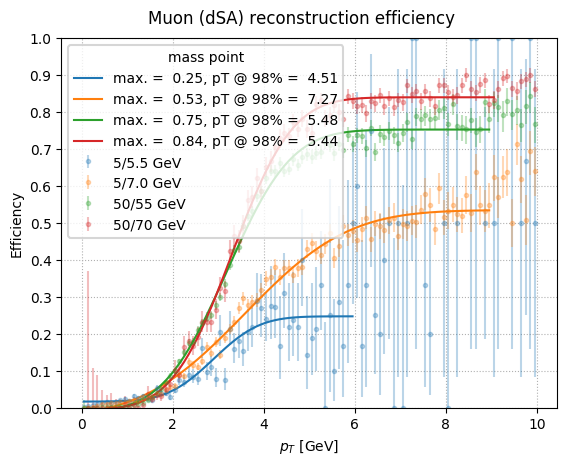

In [28]:
name = "dSA"
collection = dfs_dsa

fig,axes = plt.subplots()
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0]
all_maxs = [10]
all_vars = ['genPt','recoPt']
all_xlabels = ['$p_{T}$ [GeV]']
all_colors = {5.25:'C0', 6.0:'C1', 52.5:'C2', 60:'C3'}

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot_fit(ax, k, df, recoDf, curr_var, 100, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='mass point')
    ax.grid()

    plt.savefig("ctau-%smm_%s/pt_eff_fit.pdf" % (ctau, name.lower()))

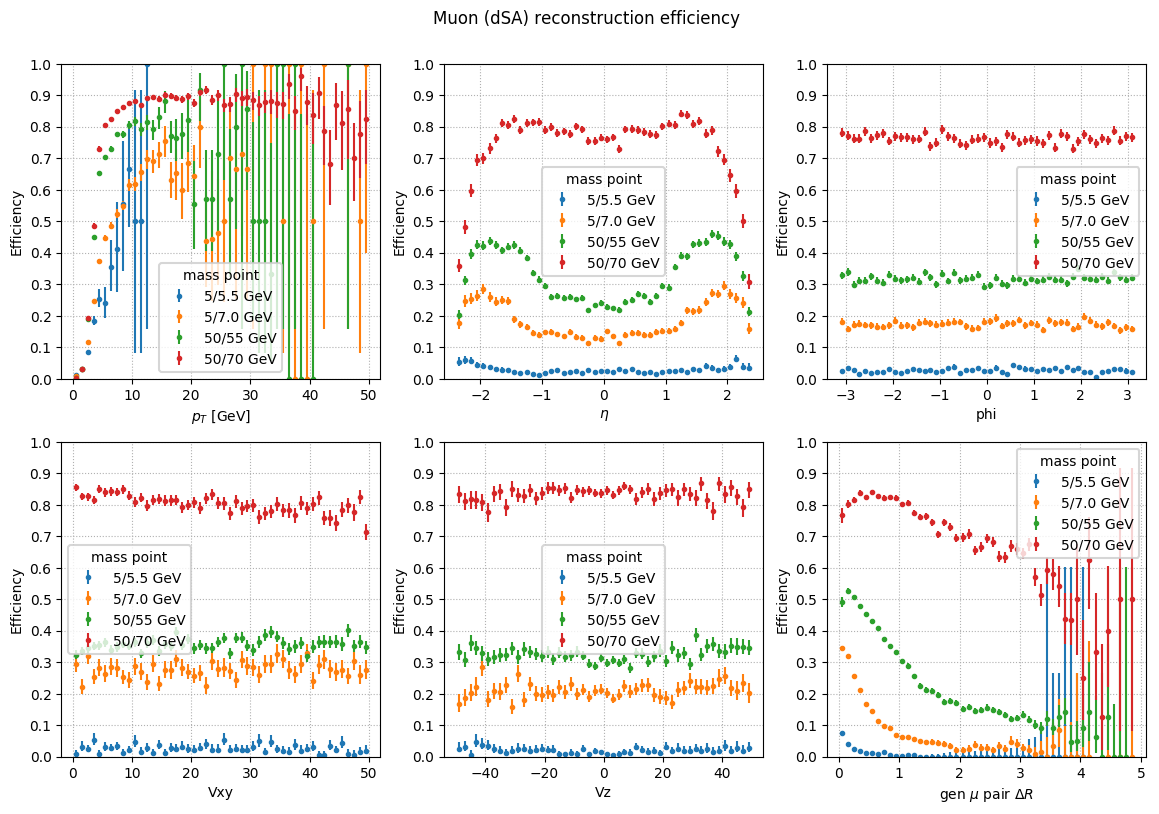

In [29]:
name = "dSA"
collection = dfs_dsa

fig,axes = plt.subplots(2,3, figsize=(14,9))
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0,-2.5,-3.15,0,-50,0]
all_maxs = [50,2.5,3.15,50,50,5]
all_vars = ['genPt', 'genEta', 'genPhi', 'genVxy', 'genVz', 'genDr','recoPt']
all_xlabels = ['$p_{T}$ [GeV]', '$\eta$', 'phi', 'Vxy', 'Vz', 'gen $\mu$ pair $\Delta R$']

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot(ax, k, df, recoDf, curr_var, 50, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='mass point')
    ax.grid()

    plt.savefig("ctau-%smm_%s/all_eff.pdf" % (ctau, name.lower()))

# pT resolution plots

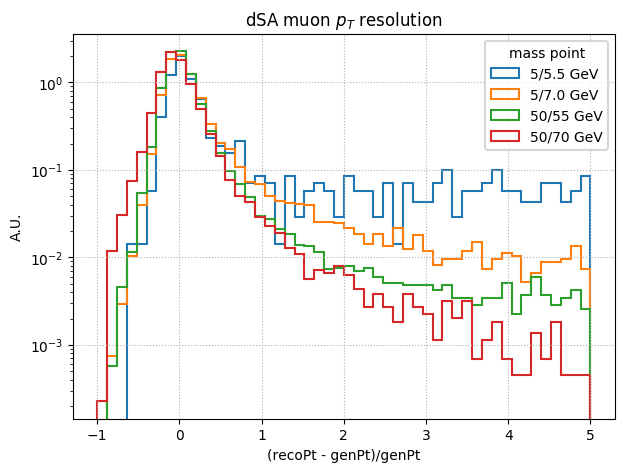

In [30]:
def make_res_plot(collection, name):

    fig,ax = plt.subplots(figsize=(7,5))
    # df = dfs[1]
    for k, df in collection.items():
        recoDf = df[['genPt', 'recoPt']].dropna()
        recoDf['reso'] = (recoDf['recoPt'] - recoDf['genPt']) / recoDf['genPt']
        recoDf['reso'].plot.hist(bins=50,range=(-1.,5), label='%s' % labels[k], histtype='step',density=True)

    ax.set_title('%s muon $p_{T}$ resolution' % name)
    ax.set_xlabel('(recoPt - genPt)/genPt')
    ax.set_ylabel('A.U.')
    ax.set_yscale('log')
    ax.legend(loc='best', title='mass point')
    ax.grid()

    plt.savefig("ctau-%smm_%s/pt_res.pdf" % (ctau, name.lower()))
    
make_res_plot(dfs_dsa, "dSA")

# Leading gen MET vs sub-leading gen MET comparison



In [ ]:
mp = 5.25

recoDf = dfs_dsa[mp].dropna()
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].set_yscale('log', nonposy='clip')
recoDf['genLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[0], label='gen leading MET (%s, 1000 mm)'%labels[mp], density=True)
recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[0], label='reco PF MET (%s, 1000 mm)'%labels[mp], density=True)
axes[0].legend(loc='upper right')
axes[0].set_xlabel('pT [GeV]')
axes[1].set_xlabel('pT [GeV]')
axes[1].set_yscale('log', nonposy='clip')
recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[1], label='gen sub-leading MET (%s, 1000 mm)'%labels[mp], density=True)
recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5, ax=axes[1], label='reco PF MET (%s, 1000 mm)'%labels[mp], density=True)
axes[1].legend(loc='upper right')
#normDf=(recoDf-recoDf.mean())/recoDf.std()
#recoDf['genLeadMetPt'].add(recoDf['genSubLeadMetPt']).plot.hist(bins=50,range=(0,500), alpha=0.5)
#recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500), alpha=0.5)
plt.savefig("ctau-%smm_%s/lead_sublead_reco_MET_comp_%s.pdf" % (ctau, "dsa", labels[mp].replace('/','-').replace(' ','').replace('.','p')))

# Correlation between gen jet pT and MET gen/reco pT

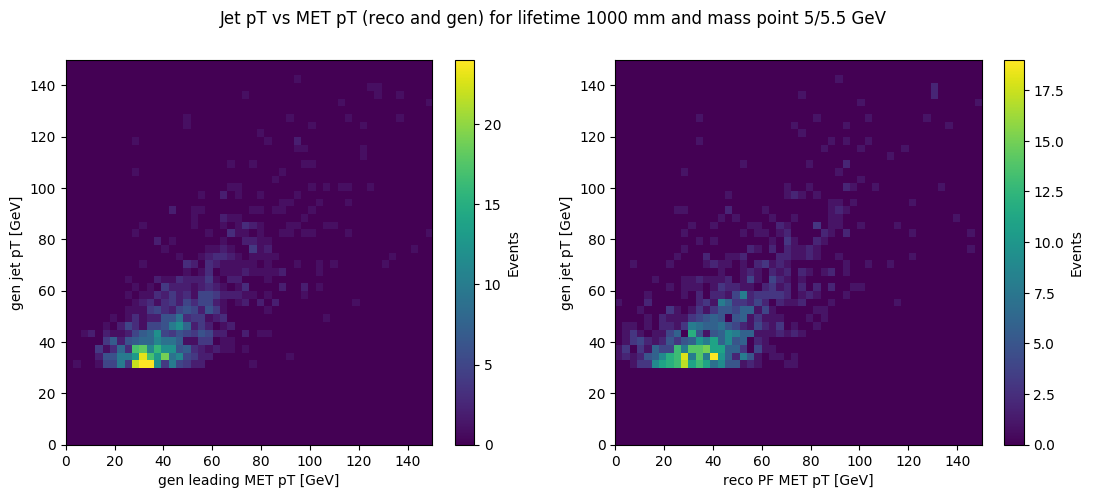

In [31]:
def make_jet_met_corr_plot(collection, masspoint, ctau):

    fig, axes = plt.subplots(1,2, figsize=(13,5))
    fig.suptitle('Jet pT vs MET pT (reco and gen) for lifetime %s mm and mass point %s' % (ctau,labels[masspoint]))
    recoDf = collection[masspoint][['nMatched','genPt','genEta','genPhi', 'genVxy', 'genJetPt', 'genLeadMetPt', 'genSubLeadMetPt', 'recoPFMetPt','recoPt']].dropna()
    #fig2, ax2 = plt.subplots(figsize=(10,8))
    #recoDf['nMatched'].plot.hist(bins=5, range=(0,5), ax=ax2)
    # recoDf['genLeadMetPt'].plot.hist(bins=50,range=(0,500))
    # recoDf['recoPFMetPt'].plot.hist(bins=50,range=(0,500))
    # recoDf['genSubLeadMetPt'].plot.hist(bins=50,range=(0,500))
    y = recoDf['genJetPt']
    x = recoDf['genLeadMetPt']
    p0 = axes[0].hist2d(x,y, bins=50, range=[[0,150],[0,150]])
    plt.colorbar(p0[3], ax=axes[0], label='Events')
    #plt.set_label('Events')
    axes[0].set_ylabel("gen jet pT [GeV]")
    axes[0].set_xlabel("gen leading MET pT [GeV]")

    x = recoDf['recoPFMetPt']
    p1 = axes[1].hist2d(x,y, bins=50, range=[[0,150],[0,150]])
    plt.colorbar(p1[3], ax=axes[1], label='Events')
    axes[1].set_ylabel("gen jet pT [GeV]")
    axes[1].set_xlabel("reco PF MET pT [GeV]")

    #plt.show()
    plt.savefig("ctau-%smm_%s/jet_met_corr_ctau-%s.pdf" % (ctau, "dsa", labels[masspoint].replace('/','-').replace(' ','').replace('.','p')))

make_jet_met_corr_plot(dfs_dsa, 5.25, ctau)

# Efficiency vs gen jet pT and gen MET pT

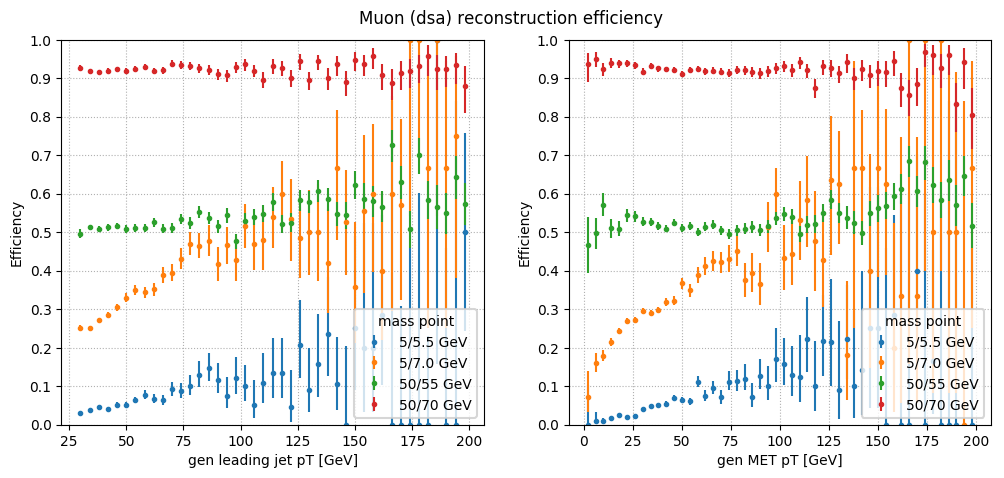

In [32]:
name = "dsa"
collection = dfs_dsa

fig,axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Muon (%s) reconstruction efficiency' % name, y=0.94)

all_mins = [0,0]
all_maxs = [200,200]
all_vars = ['genJetPt', 'genLeadMetPt', 'recoPt']
all_xlabels = ['gen leading jet pT [GeV]', 'gen MET pT [GeV]']

for i,ax in enumerate(fig.axes):
    curr_var = all_vars[i]
    for k, df in collection.items():
        recoDf = df[all_vars].dropna()
        make_plot(ax, k, df, recoDf, curr_var, 50, all_mins[i], all_maxs[i])

    ax.set_xlabel(all_xlabels[i])
    ax.set_ylabel('Efficiency')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_ylim((0,1))
    ax.legend(loc='best', title='mass point')
    ax.grid()

    plt.savefig("ctau-%smm_%s/jet_met_eff.pdf" % (ctau, name))